In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [67]:
# Load dataset
df = pd.read_csv("../name_of_file.csv")

# Separate features and labels
X = df.drop(columns=['loan_status', 'confidence']).values
y = df['loan_status'].values

print(df['loan_status'].value_counts(normalize=True))

# Split by percentage
train_percentage = 0.8  # 80% train, 20% test
X_train, X_test, train_labels, test_labels = train_test_split(
    X, y, train_size=train_percentage, random_state=42, shuffle=True
)


# Step 3: create scaler
scaler = MinMaxScaler(feature_range=(0, np.pi/2))

# Step 4: fit scaler on your training set or just transform this vector
X_train = scaler.fit_transform(X_train.astype(float))  # or scaler.transform(x_array) if already fitted
X_test = scaler.fit_transform(X_test.astype(float))

X_train = [row.tolist() for row in X_train]
X_test = [row.tolist() for row in X_test]
train_labels = [row.tolist() for row in train_labels]
test_labels = [row.tolist() for row in test_labels]


loan_status
1    0.5
0    0.5
Name: proportion, dtype: float64


In [84]:
from qiskit.circuit.library import zz_feature_map

n_qubits = len(X_train[0])  # e.g., 10
feature_map = zz_feature_map(feature_dimension=n_qubits,entanglement='linear', reps=2)
#feature_map.draw("mpl")

In [ ]:
x_sample = X_train[0]  # shape = (n_qubits,)
circuit = feature_map.assign_parameters(x_sample)
x_sample

[0.0,
 0.6283185307179586,
 0.40183161848241544,
 0.0,
 1.5707963267948966,
 1.5707963267948966,
 0.9103829398909518,
 0.0,
 0.0]

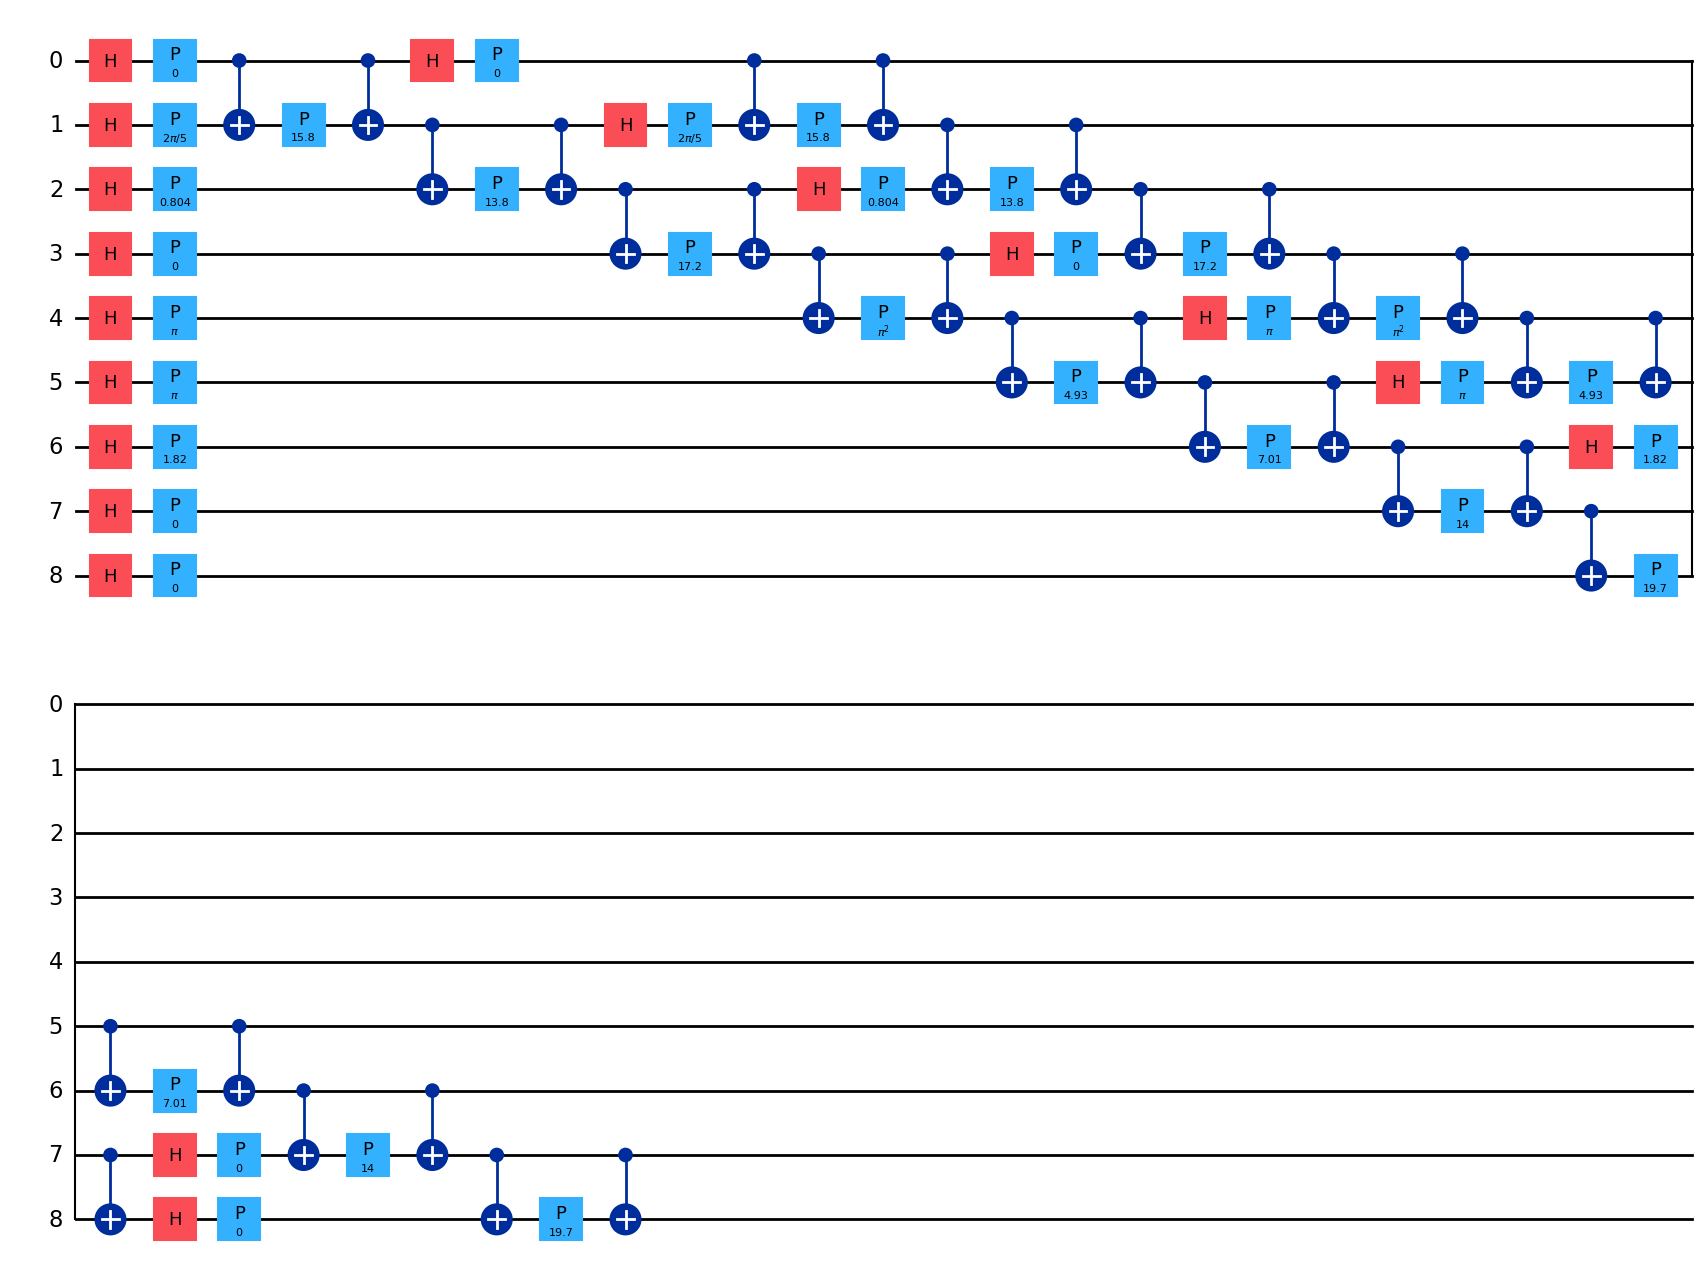

In [86]:
circuit.draw("mpl")

In [87]:
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit.primitives import StatevectorEstimator

In [88]:
lista_observables = []


for i in range(n_qubits):
    obs = SparsePauliOp.from_sparse_list(
        [("Z", [i], 1.0)],
        num_qubits=n_qubits
    )
    lista_observables.append(obs)
    print(f"Z on qubit {i}:", obs)

# Two-qubit ZZ correlations
for i in range(n_qubits):
    for j in range(i + 1, n_qubits):
        pauli_str = ['I'] * n_qubits
        pauli_str[i] = 'Z'
        pauli_str[j] = 'Z'
        obs = SparsePauliOp(''.join(pauli_str))
        lista_observables.append(obs)

Z on qubit 0: SparsePauliOp(['IIIIIIIIZ'],
              coeffs=[1.+0.j])
Z on qubit 1: SparsePauliOp(['IIIIIIIZI'],
              coeffs=[1.+0.j])
Z on qubit 2: SparsePauliOp(['IIIIIIZII'],
              coeffs=[1.+0.j])
Z on qubit 3: SparsePauliOp(['IIIIIZIII'],
              coeffs=[1.+0.j])
Z on qubit 4: SparsePauliOp(['IIIIZIIII'],
              coeffs=[1.+0.j])
Z on qubit 5: SparsePauliOp(['IIIZIIIII'],
              coeffs=[1.+0.j])
Z on qubit 6: SparsePauliOp(['IIZIIIIII'],
              coeffs=[1.+0.j])
Z on qubit 7: SparsePauliOp(['IZIIIIIII'],
              coeffs=[1.+0.j])
Z on qubit 8: SparsePauliOp(['ZIIIIIIII'],
              coeffs=[1.+0.j])


In [89]:
estimator = StatevectorEstimator()
 
pub = (
    circuit,  # ISA circuit
    lista_observables
)
 
job_result = estimator.run(pubs=[pub]).result()[0]

job_result.data.evs

array([-9.96523921e-01, -1.10100002e-01, -1.59536272e-02,  5.80326906e-02,
        1.99117985e-01, -1.64906950e-01, -2.17832963e-02,  7.41694330e-02,
        6.29681725e-01,  1.17788765e-01, -1.37165436e-02, -1.03838893e-01,
        1.25380956e-01,  3.65421247e-02, -1.00457075e-02, -6.93279594e-02,
       -6.27492902e-01, -1.16450355e-01, -1.22310550e-02,  1.47684680e-02,
        4.30425176e-03, -1.18327149e-03, -8.16605475e-03, -7.39116142e-02,
        6.42736280e-03, -4.33744606e-03, -1.26414329e-03,  3.47522589e-04,
        2.39834097e-03,  2.17075758e-02, -6.74840708e-01, -9.56999403e-03,
        2.63086402e-03,  1.81562556e-02,  1.64333721e-01,  1.41811155e-02,
       -3.17665410e-03, -2.19228906e-02, -1.98425835e-01, -2.24005940e-01,
       -6.38939937e-03, -5.78309644e-02,  1.37408088e-02,  1.58981712e-02,
        1.10484054e-01])

In [93]:
X_train_fan_out = []


for i in X_train:   
    circuit = feature_map.assign_parameters(i)
    pub = (
    circuit,  # ISA circuit
    lista_observables
    )
    job_result = estimator.run(pubs=[pub]).result()[0]

    nex_X_point = job_result.data.evs
    X_train_fan_out.append(nex_X_point)


In [94]:

X_train_fan_out = np.array(X_train_fan_out)

In [95]:
X_train_fan_out

array([[-0.99652392, -0.1101    , -0.01595363, ...,  0.01374081,
         0.01589817,  0.11048405],
       [-0.99652392, -0.05573832,  0.02216768, ..., -0.03771434,
        -0.02209062,  0.05593275],
       [ 0.0416898 ,  0.01150074, -0.85380333, ..., -0.0123213 ,
        -0.03559489,  0.27586463],
       ...,
       [ 0.62968173, -0.56840448, -0.81484086, ...,  0.56840448,
        -0.5130904 , -0.90268536],
       [ 0.85660956,  0.56750397, -0.53827491, ..., -0.45552935,
        -0.46109144,  0.66250015],
       [ 0.74992652, -0.39557808,  0.51365992, ..., -0.47796509,
         0.3852072 , -0.52748912]], shape=(86, 45))

In [96]:
X_test_fan_out = []


for i in X_test:   
    circuit = feature_map.assign_parameters(i)
    pub = (
    circuit,  # ISA circuit
    lista_observables
    )
    job_result = estimator.run(pubs=[pub]).result()[0]

    nex_X_point = job_result.data.evs
    X_test_fan_out.append(nex_X_point)

In [97]:
X_test_fan_out = np.array(X_test_fan_out)

In [98]:
X_test_fan_out

array([[ 9.29537202e-01,  7.89181892e-01,  2.15001096e-01,
        -2.21489277e-01,  3.96499075e-01, -1.73027048e-01,
         4.85852658e-02,  2.48044333e-01,  9.02685362e-01,
         2.74784929e-01,  4.38572082e-02, -1.56188984e-01,
         3.57913911e-01, -1.99935128e-01,  1.94078342e-01,
         7.12382942e-01,  8.39079626e-01,  1.59605581e-01,
        -4.29183788e-02,  9.83493487e-02, -5.49391600e-02,
         5.33298035e-02,  1.95752096e-01,  2.30566435e-01,
        -1.11335269e-01,  1.92640129e-02, -1.07611154e-02,
         1.04458854e-02,  3.83426120e-02,  4.51618120e-02,
        -1.73027048e-01,  3.83236358e-02, -3.72010050e-02,
        -1.36549813e-01, -1.60835078e-01, -2.21489277e-01,
         8.52477358e-02,  3.12909890e-01,  3.68560641e-01,
        -3.84884257e-01, -1.74795327e-01, -2.05882523e-01,
         1.76546201e-01,  1.99851517e-01,  8.49005172e-01],
       [ 9.29537202e-01,  3.69541897e-01, -3.58866583e-01,
         5.46358932e-01,  3.96499075e-01,  8.01444514e-

In [106]:
def evaluate_classification(model, X, y):
    """
    Calculates accuracy, F1, precision, recall, support, and confusion matrix.

    Parameters:
    - model: The trained classification model (must have a .predict() method).
    - X: The features to predict on.
    - y: The true labels.

    Returns:
    - metrics: A dictionary containing 'accuracy' and 'confusion_matrix'.
    - report_df: A pandas DataFrame containing precision, recall, f1-score, and support per class.
    """
    # 1. Generate Predictions
    y_pred = model.predict(X)

    # 2. Calculate Metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    # 3. Calculate Precision, Recall, F1, and Support
    # precise_recall_fscore_support returns lists for each class
    precision_l, recall_l, f1_l, support_l = precision_recall_fscore_support(y, y_pred)

    # 4. Create a DataFrame for per-class metrics
    # We attempt to use model.classes_ if available for row names, otherwise simple indices
    try:
        classes = model.classes_
    except AttributeError:
        classes = list(range(len(precision_l)))

    report_df = pd.DataFrame({
        'Precision': precision_l,
        'Recall': recall_l,
        'F1-Score': f1_l,
        'Support': support_l
    }, index=classes)

    # 5. Calculate Confusion Matrix
    conf_matrix = confusion_matrix(y, y_pred)

    
    y_proba = model.predict_proba(X)[:, 1]

    # 6. ROC AUC Score
    # Measures ability to distinguish between classes. 1.0 is perfect, 0.5 is random guessing.
    roc_auc = roc_auc_score(y, y_proba)

    # Bundle everything into a dictionary
    metrics = {
        "accuracy": accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        "confusion_matrix": conf_matrix,
        "roc_auc": roc_auc
    }


    print(report_df)

    for key in metrics.keys():
        print(key, metrics[key])
        
    print(conf_matrix)

    prediction_df = create_prediction_df(model, X, y)

    return metrics, report_df, prediction_df

In [107]:
import xgboost
from sklearn import evaluate_classification

xgb_model = xgboost.XGBClassifier(objective = "binary:logistic", random_state=42)

xgb_model.fit(X_train_fan_out, train_labels)

metrics, report_df, prediction_df = evaluate_classification(xgb_model, X_test_fan_out, test_labels)

ImportError: cannot import name 'evaluate_classification' from 'sklearn' (/home/edoardo/Documents/github/QuantumHack-QRM/.venv_3_12/lib64/python3.12/site-packages/sklearn/__init__.py)